In [116]:
import numpy as np
from typing import List, Tuple
from dataclasses import dataclass
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
@dataclass
class EpsilonGreedyAgent:
    e: float
    Q: np.ndarray
    _Q: np.ndarray
    count_selected: np.ndarray

    history: np.ndarray

    N = 1

    def act(self):
        # explore
        if np.random.rand() < self.e:
          action = np.random.choice(range(len(self.Q)))
        
        # exploit
        else:
          action = np.random.choice(np.flatnonzero(self.Q == self.Q.max()))
        
        self.N += 1
        self.count_selected[action] += 1

        return action
    
    def update(self, action, reward):
        # Q[a, n+1] = Q[a, n] + (R - Q[a, n]) / n 
        self._Q[action] += reward
        # self.Q[action] = self.Q[action] + (reward - self.Q[action]) / self.N
        self.Q[action] = self._Q[action] / self.count_selected[action]
        self.history[self.N-2] = self.Q

In [118]:
@dataclass
class Testbed:
  N_Trials: int
  arms: List[Tuple[float, float]]
  
  stability = 1.0
  update_arms = lambda self: []

  def get_reward(self, arm):
    return np.random.normal(self.arms[arm][0], self.arms[arm][1])

  def run(self, agent: EpsilonGreedyAgent):
    rewards = np.zeros(self.N_Trials)
    for i in range(self.N_Trials):
      action = agent.act()
      reward = self.get_reward(action)
      agent.update(action, reward)
      rewards[i] = reward
    return rewards

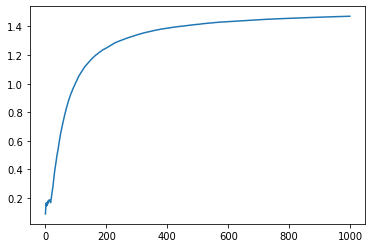

In [137]:
history = np.zeros(1000)

n_arm = 10
optimism = 5

for i in range(200):
  agent = EpsilonGreedyAgent(0, np.ones(n_arm) * optimism, np.ones(n_arm) * optimism, np.zeros(n_arm), np.zeros((1000, n_arm)))
  testbed = Testbed(1000, [(np.random.normal(0, 1), 1) for _ in range(n_arm)])

  rewards = testbed.run(agent)

  avg_rewards = np.cumsum(rewards) / (np.array(range(1000)) + 1)

  history += avg_rewards

sns.lineplot(data=history/200)
plt.show();


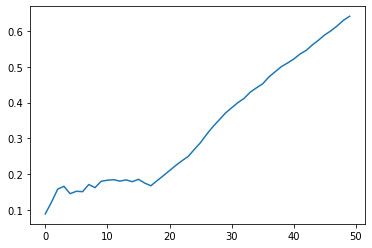

In [138]:
sns.lineplot(data=history[:50]/200)
plt.show();
